In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

home_dir = '/nfs/a319/gy17m2a/PhD/'

In [6]:
df_changes_season =pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_season_changes.csv")
df_changes=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_changes.csv")

In [5]:
df_changes_noNan = df_changes.dropna()

### Giving one value for whole dataset

In [7]:
# Assuming you have columns for present and future D50 values
present_D50 = df_changes_noNan['D50_mean_present']  # Column with present D50 values
future_D50 = df_changes_noNan['D50_mean_future']  # Column with future D50 values

# Perform a paired t-test to assess if the change is significant
t_stat, p_value = stats.ttest_rel(present_D50, future_D50)
t_stat, p_value

(-12.606019576904389, 3.938709850890727e-36)

In [8]:
df_changes_noNan

,gauge_num,dur_for_which_this_is_amax,theta_mean_present,D_mean_present,R_present,D50_mean_present,D50_median_present,theta_mean_future,D_mean_future,R_future,D50_mean_future,D50_median_future,theta_mean_diff,D_mean_diff,R_diff,D50_mean_diff,D50_median_diff
0,0,0.5,3.509113,203.989474,0.710896,56.248435,50.000000,3.605700,209.604167,0.662434,54.303986,50.000000,0.096586,5.614693,-0.048462,-1.944449,0.000000
1,0,1.0,3.462628,201.287234,0.594398,57.020084,54.920635,3.661780,212.864198,0.513373,57.723172,61.904762,0.199152,11.576963,-0.081025,0.703088,6.984127
2,0,12.0,3.603180,209.457711,0.368337,47.169764,46.875000,3.369130,195.852041,0.176573,49.979799,48.742929,-0.234051,-13.605671,-0.191764,2.810035,1.867929
3,0,2.0,3.493211,203.065041,0.638232,54.244611,50.000000,3.747671,217.857143,0.451163,57.977590,60.000000,0.254460,14.792102,-0.187069,3.732979,10.000000
4,0,24.0,3.340774,194.203704,0.222540,48.936500,47.687147,3.306149,192.190871,0.121900,54.063155,52.941176,-0.034626,-2.012832,-0.100640,5.126655,5.254030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,1292,12.0,3.740287,217.427928,0.390359,47.606746,48.000000,3.868211,224.864322,0.361360,49.583604,50.000000,0.127924,7.436394,-0.028999,1.976858,2.000000
9026,1292,2.0,3.449628,200.531532,0.686386,52.024532,50.000000,3.729103,216.777778,0.568451,52.219492,50.000000,0.279475,16.246246,-0.117936,0.194960,0.000000
9027,1292,24.0,3.733993,217.062044,0.294501,50.560591,50.000000,3.863755,224.605263,0.343894,51.388839,48.464318,0.129762,7.543219,0.049393,0.828249,-1.535682
9028,1292,3.0,3.661001,212.818898,0.615237,52.488110,50.000000,3.827539,222.500000,0.604478,52.973305,51.470588,0.166538,9.681102,-0.010758,0.485195,1.470588


### Giving one value per row

In [37]:
def row_t_test(row):
    t_stat, p_val = stats.ttest_ind([row['D50_mean_present']], [row['D50_mean_future']], equal_var=False)
    return pd.Series({'t_stat': t_stat, 'p_val': p_val})

# Apply the t-test row-by-row
df_changes_noNan[['t_stat', 'p_val']] = df_changes_noNan.apply(row_t_test, axis=1)

df_changes_noNan

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,gauge_num,dur_for_which_this_is_amax,theta_mean_present,D_mean_present,R_present,D50_mean_present,D50_median_present,theta_mean_future,D_mean_future,R_future,D50_mean_future,D50_median_future,theta_mean_diff,D_mean_diff,R_diff,D50_mean_diff,D50_median_diff,t_stat,p_val
0,0,0.5,3.509113,203.989474,0.710896,56.248435,50.000000,3.605700,209.604167,0.662434,54.303986,50.000000,0.096586,5.614693,-0.048462,-1.944449,0.000000,NaN,NaN
1,0,1.0,3.462628,201.287234,0.594398,57.020084,54.920635,3.661780,212.864198,0.513373,57.723172,61.904762,0.199152,11.576963,-0.081025,0.703088,6.984127,NaN,NaN
2,0,12.0,3.603180,209.457711,0.368337,47.169764,46.875000,3.369130,195.852041,0.176573,49.979799,48.742929,-0.234051,-13.605671,-0.191764,2.810035,1.867929,NaN,NaN
3,0,2.0,3.493211,203.065041,0.638232,54.244611,50.000000,3.747671,217.857143,0.451163,57.977590,60.000000,0.254460,14.792102,-0.187069,3.732979,10.000000,NaN,NaN
4,0,24.0,3.340774,194.203704,0.222540,48.936500,47.687147,3.306149,192.190871,0.121900,54.063155,52.941176,-0.034626,-2.012832,-0.100640,5.126655,5.254030,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,1292,12.0,3.740287,217.427928,0.390359,47.606746,48.000000,3.868211,224.864322,0.361360,49.583604,50.000000,0.127924,7.436394,-0.028999,1.976858,2.000000,NaN,NaN
9026,1292,2.0,3.449628,200.531532,0.686386,52.024532,50.000000,3.729103,216.777778,0.568451,52.219492,50.000000,0.279475,16.246246,-0.117936,0.194960,0.000000,NaN,NaN
9027,1292,24.0,3.733993,217.062044,0.294501,50.560591,50.000000,3.863755,224.605263,0.343894,51.388839,48.464318,0.129762,7.543219,0.049393,0.828249,-1.535682,NaN,NaN
9028,1292,3.0,3.661001,212.818898,0.615237,52.488110,50.000000,3.827539,222.500000,0.604478,52.973305,51.470588,0.166538,9.681102,-0.010758,0.485195,1.470588,NaN,NaN


### Check normality

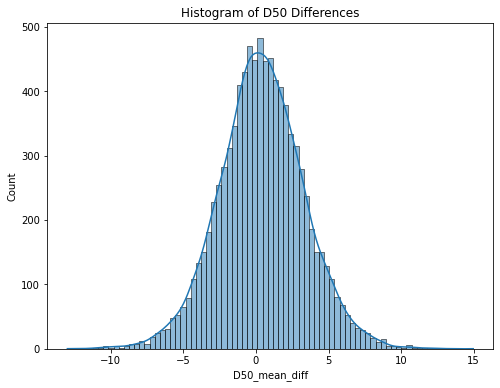

Shapiro-Wilk Test p-value: 1.0
Differences are normally distributed.


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Checking for normality (visual inspection)
plt.figure(figsize=(8, 6))
sns.histplot(df_changes['D50_mean_diff'], kde=True)
plt.title('Histogram of D50 Differences')
plt.show()

# 2. Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df_changes['D50_mean_diff'])
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

# If p-value < 0.05, the differences are likely not normally distributed
if shapiro_test.pvalue < 0.05:
    print("Differences are not normally distributed. Consider using a non-parametric test.")
else:
    print("Differences are normally distributed.")
